<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/Tensorflow_(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (easy but not complexity (straight))
2. Functional (more difficult but able to increase complexity)

~~3. Subclassing~~ (the most difficult but able to adjust as much as you like)

# Sequential

## import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Define

In [4]:
#Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3")
    ]
)

### Train (รวมกับการนำเ้าข้อมูลใน colab notebook หน้า)

Predict

In [21]:
#Call model on a test input
x = tf.ones((5,4))
y = model(x)

In [22]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [23]:
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-0.2517945 , -0.05567136,  0.11909336,  0.2945152 ],
       [-0.2517945 , -0.05567136,  0.11909336,  0.2945152 ],
       [-0.2517945 , -0.05567136,  0.11909336,  0.2945152 ],
       [-0.2517945 , -0.05567136,  0.11909336,  0.2945152 ],
       [-0.2517945 , -0.05567136,  0.11909336,  0.2945152 ]],
      dtype=float32)>

สร้าง sequential แบบที่สอง

In [19]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

สร้าง NN แบบ Sequential แบบ สมบูรณ์

In [13]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3")
    ]
)

In [14]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


ปรับเปลี่ยน Network

In [24]:
model2.pop()

In [25]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.add(layers.Dense(6))

In [29]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [30]:
x = tf.ones((5,4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[ 0.58311826, -0.2682156 ,  0.26381838,  0.02993006, -0.46466964,
        -0.09369642],
       [ 0.58311826, -0.2682156 ,  0.26381838,  0.02993006, -0.46466964,
        -0.09369642],
       [ 0.58311826, -0.2682156 ,  0.26381838,  0.02993006, -0.46466964,
        -0.09369642],
       [ 0.58311826, -0.2682156 ,  0.26381838,  0.02993006, -0.46466964,
        -0.09369642],
       [ 0.58311826, -0.2682156 ,  0.26381838,  0.02993006, -0.46466964,
        -0.09369642]], dtype=float32)>

ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

load data

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## แปลงค่าเป็น 0-1 เพื่อนำเข้า network 

In [12]:
#Normlize pixel vlues to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

plot รูปตัวอย่าง

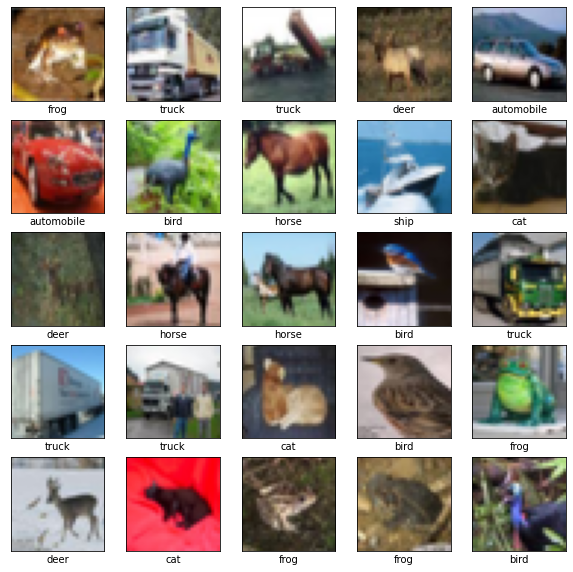

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  #The CIFAR labels happen to be arrays,
  #which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

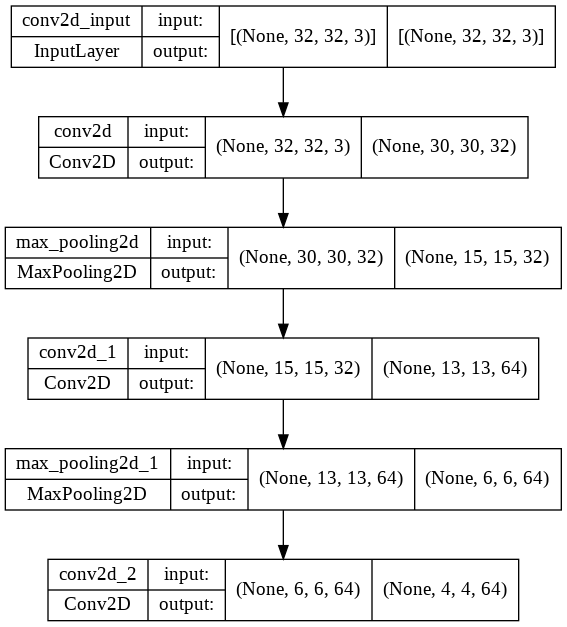

In [41]:
keras.utils.plot_model(model, show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

Define training parameters

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train

In [47]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1869 - accuracy: 0.5801 - val_loss: 1.1012 - val_accuracy: 0.6107
Epoch 2/2
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0303 - accuracy: 0.6372 - val_loss: 1.0509 - val_accuracy: 0.6332


Test

313/313 - 4s - loss: 1.0509 - accuracy: 0.6332 - 4s/epoch - 13ms/step


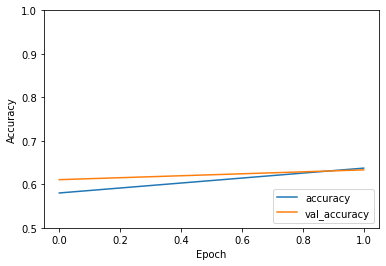

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [50]:
print(test_acc)

0.6331999897956848


Functional

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
input_image = keras.Input(shape=(32,32,3), name="img")
model = layers.Conv2D(32,(3,3), activation='relu', name="conv1")(input_image)
model = layers.MaxPooling2D((2,2), name="maxp1")(model)
model = layers.Conv2D(64,(3,3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2,2), name="maxp2")(model)
model = layers.Conv2D(64,(3,3), activation='relu', name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation='relu')(model)
output = layers.Dense(10)(model)

In [46]:
my_model = keras.Model(input_image, output, name="mymodel")

In [47]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0   

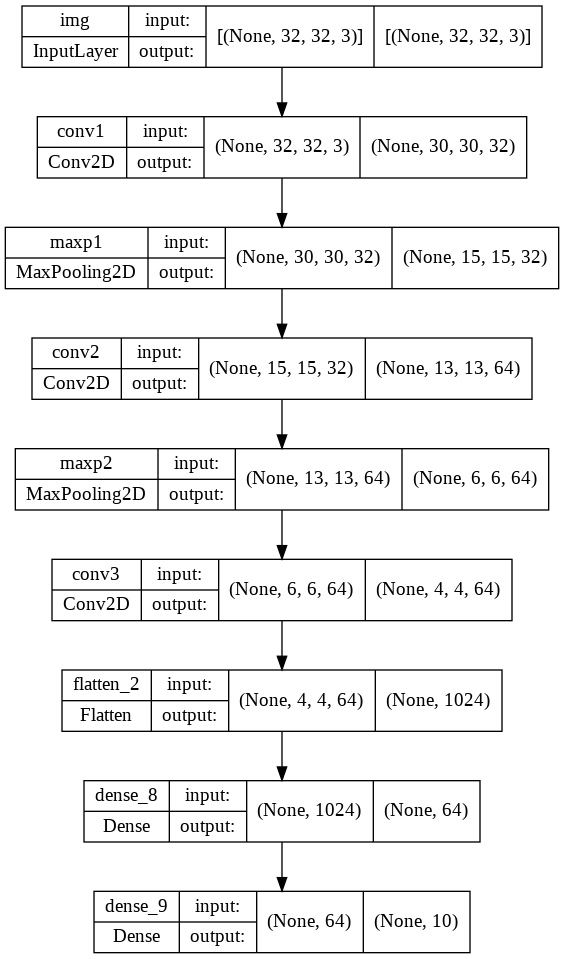

In [48]:
keras.utils.plot_model(my_model,show_shapes=True)

In [49]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5225 - accuracy: 0.4469 - val_loss: 1.2987 - val_accuracy: 0.5396
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1713 - accuracy: 0.5879 - val_loss: 1.0990 - val_accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0304 - accuracy: 0.6373 - val_loss: 0.9852 - val_accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9345 - accuracy: 0.6721 - val_loss: 0.9425 - val_accuracy: 0.6699
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8593 - accuracy: 0.6999 - val_loss: 1.0659 - val_accuracy: 0.6350
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8049 - accuracy: 0.7181 - val_loss: 0.9480 - val_accuracy: 0.6703
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7530 - accuracy: 0.7373 - val_loss: 0.8938 - va

313/313 - 1s - loss: 0.8610 - accuracy: 0.7115 - 1s/epoch - 4ms/step


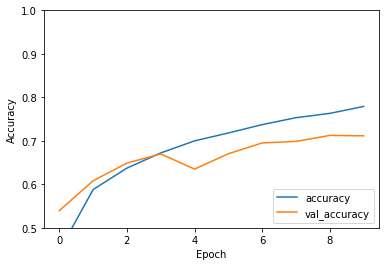

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images, test_labels, verbose=2)

In [52]:
print(test_acc)

0.7114999890327454


Resnet

In [3]:
inputs = keras.Input(shape=(32,32,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                         

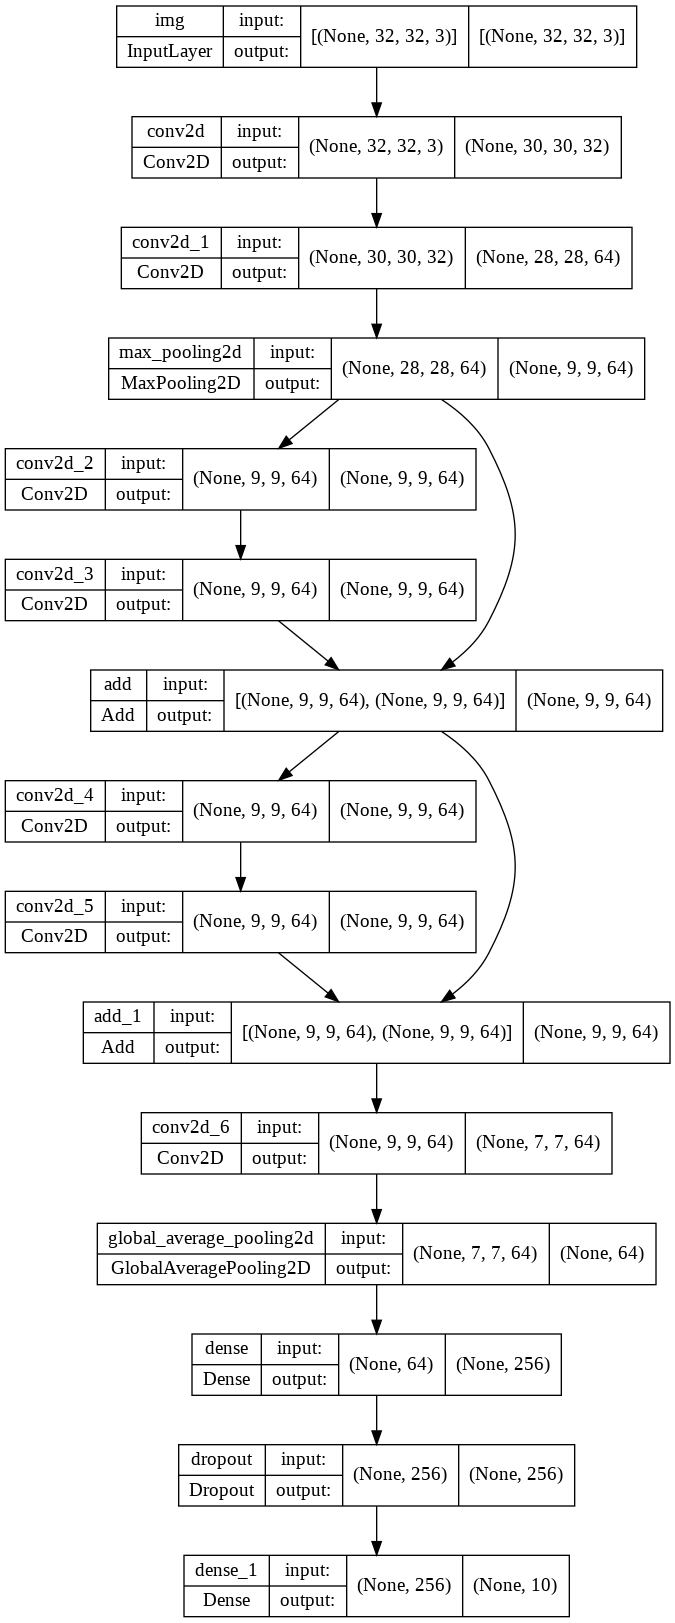

In [4]:
keras.utils.plot_model(resnet_model,show_shapes=True)

In [5]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = resnet_model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3923 - accuracy: 0.8644 - val_loss: 0.8183 - val_accuracy: 0.7539
Epoch 2/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.3672 - accuracy: 0.8726 - val_loss: 0.7679 - val_accuracy: 0.7780
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.3410 - accuracy: 0.8801 - val_loss: 0.7838 - val_accuracy: 0.7636
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3185 - accuracy: 0.8888 - val_loss: 0.7843 - val_accuracy: 0.7835
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.2990 - accuracy: 0.8944 - val_loss: 0.8340 - val_accuracy: 0.7653
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2821 - accuracy: 0.9013 - val_loss: 0.8304 - val_accuracy: 0.7768
Epoch 7/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.2626 - accuracy: 0.9081 - val_loss: 0.8714 -

313/313 - 2s - loss: 1.0661 - accuracy: 0.7714 - 2s/epoch - 5ms/step


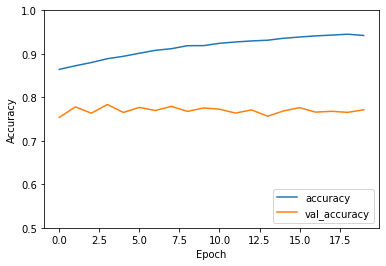

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = resnet_model.evaluate(test_images, test_labels, verbose=2)

In [22]:
print(test_acc)

0.771399974822998


Modified resnet

In [62]:
inputs = keras.Input(shape=(32,32,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
block_2_output = layers.add([x, block_1_output])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

moresnet_model = keras.Model(inputs, outputs, name="toy_resnet")
moresnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_49 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_50 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_49[0][0]']              
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_50[0][0]']              
                                                                                         

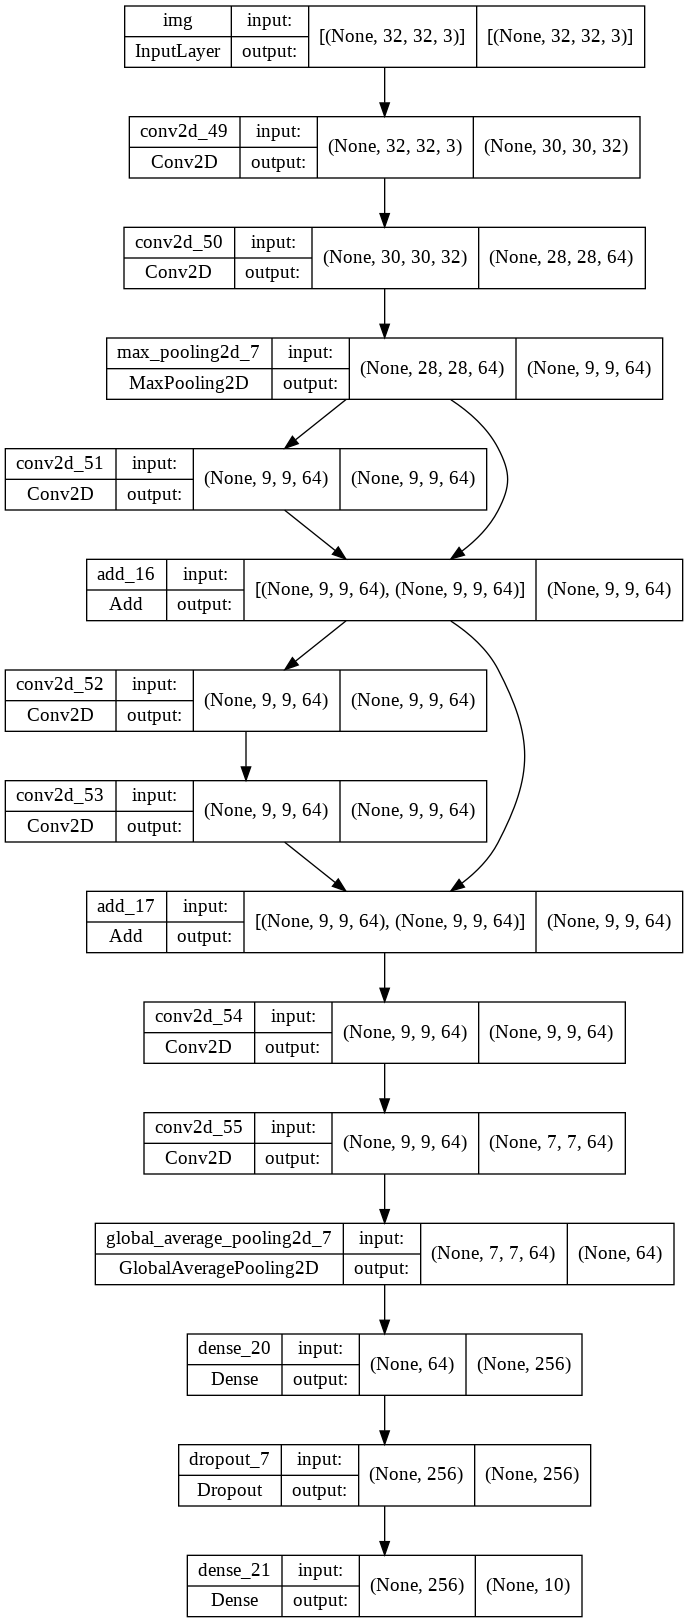

In [63]:
keras.utils.plot_model(moresnet_model,show_shapes=True)

In [64]:
moresnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
history = moresnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.6485 - accuracy: 0.3649 - val_loss: 1.3634 - val_accuracy: 0.4990
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1996 - accuracy: 0.5636 - val_loss: 1.0505 - val_accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9869 - accuracy: 0.6476 - val_loss: 0.9174 - val_accuracy: 0.6775
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8606 - accuracy: 0.6951 - val_loss: 0.8173 - val_accuracy: 0.7213
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7727 - accuracy: 0.7307 - val_loss: 0.7803 - val_accuracy: 0.7310
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6988 - accuracy: 0.7573 - val_loss: 0.8035 - val_accuracy: 0.7264
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6472 - accuracy: 0.7748 - val_loss: 0.7190 -

313/313 - 2s - loss: 0.7148 - accuracy: 0.7650 - 2s/epoch - 5ms/step


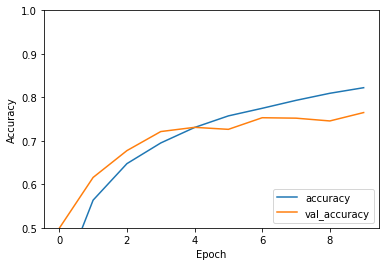

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = moresnet_model.evaluate(test_images, test_labels, verbose=2)

In [67]:
print(test_acc)

0.7649999856948853
